In [7]:
# parameters 
EXPERIMENT_NAME = "Default"
NOTEBOOK_NAME = "main.ipynb"
PARAMETERS = { 
    "datasetPath": "data/sample.csv",
    "color": "green"
}

In [8]:
# ml-flowのセットアップ
import mlflow
import sqlite3

# mlflow connect
DB_PATH = 'mlflow.db'
mlflow.set_tracking_uri(f'sqlite:///{DB_PATH}')

# 実験IDを新規生成
experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
if experiment is None:  # 当該Experiment存在しないとき、新たに作成
    experiment_id = mlflow.create_experiment(
                            name=EXPERIMENT_NAME)
else: # 当該Experiment存在するとき、IDを取得
    experiment_id = experiment.experiment_id
print("exp id:", experiment_id)

exp id: 0


### メイン処理

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = np.loadtxt(PARAMETERS["datasetPath"], delimiter=",")

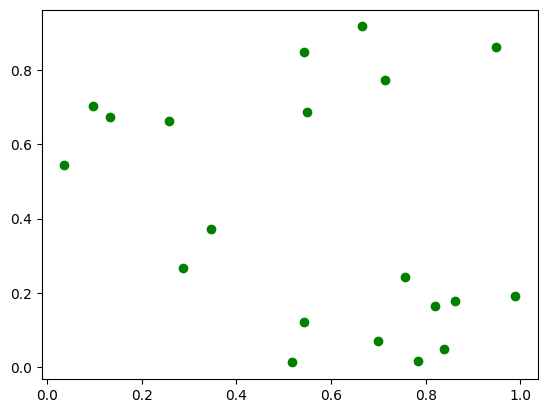

In [11]:
fig, ax = plt.subplots()
ax.plot(data[:, 0], data[:,1], "o", c=PARAMETERS["color"])
fig.show()

### 保存処理

In [12]:
# 一度ノートブック全体を保存してから実行
with mlflow.start_run(experiment_id=experiment_id):
    mlflow.log_params(PARAMETERS)
    mlflow.log_figure(fig, "test.png")
    mlflow.log_artifact(NOTEBOOK_NAME)